In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
stock='./dowjones.csv'
df=pd.read_csv(stock)
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-20,25776.0,25901.0,25554.0,25696.0,25696.0,280261.0
1,2019-05-21,25719.0,25895.0,25711.0,25875.0,25875.0,246483.0
2,2019-05-22,25860.0,25904.0,25733.0,25771.0,25771.0,208634.0
3,2019-05-23,25779.0,25779.0,25320.0,25463.0,25463.0,196584.0
4,2019-05-24,25494.0,25664.0,25457.0,25620.0,25620.0,300183.0


<p>checking for any null values</p>

In [4]:
df.isna().sum()

Date          0
Open         16
High         16
Low          16
Close        16
Adj Close    16
Volume       16
dtype: int64

<p>Filling the null values with their preceeding values</p>

In [5]:
df.fillna(method='bfill',inplace=True)

<p>checking again for the nulls to see whether they're removed</p>

In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.index

RangeIndex(start=0, stop=303, step=1)

In [8]:
df.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,303,303.000000,303.000000,303.000000,303.000000,303.000000,3.030000e+02
unique,303,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-02-12,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,26327.844884,26542.883167,26094.029703,26361.977226,26361.977226,1.143039e+07
std,NaN,2184.856753,2036.475631,2341.219764,2137.241825,2137.241825,3.041137e+07
min,NaN,18230.000000,18507.000000,18086.000000,18220.000000,18220.000000,9.274000e+03
25%,NaN,25557.500000,25898.000000,25330.000000,25645.000000,25645.000000,1.464750e+05
50%,NaN,26807.000000,26924.000000,26689.000000,26802.000000,26802.000000,2.022950e+05
75%,NaN,27836.000000,27949.500000,27698.500000,27831.000000,27831.000000,3.384510e+05


In [9]:
df['Date'].describe()

count            303
unique           303
top       2020-02-12
freq               1
Name: Date, dtype: object

In [10]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

<p>the date datatype should be date instead of object and hence we correct it</p>

In [11]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [12]:
df['Date']

0     2019-05-20
1     2019-05-21
2     2019-05-22
3     2019-05-23
4     2019-05-24
         ...    
298   2020-05-12
299   2020-05-13
300   2020-05-14
301   2020-05-15
302   2020-05-17
Name: Date, Length: 303, dtype: datetime64[ns]

In [13]:
dow_df=df.copy()

In [14]:
dow_df.set_index('Date',inplace=True,verify_integrity=True)

In [15]:
dow_df.index

DatetimeIndex(['2019-05-20', '2019-05-21', '2019-05-22', '2019-05-23',
               '2019-05-24', '2019-05-26', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-05-31',
               ...
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-10',
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-17'],
              dtype='datetime64[ns]', name='Date', length=303, freq=None)

In [16]:
dow_df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-20,25776.0,25901.0,25554.0,25696.0,25696.0,280261.0
2019-05-21,25719.0,25895.0,25711.0,25875.0,25875.0,246483.0
2019-05-22,25860.0,25904.0,25733.0,25771.0,25771.0,208634.0
2019-05-23,25779.0,25779.0,25320.0,25463.0,25463.0,196584.0
2019-05-24,25494.0,25664.0,25457.0,25620.0,25620.0,300183.0


<p>Setting the frequency accounting for the business days</p>

In [17]:
dow_df=dow_df.asfreq('b')
dow_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2019-05-20 to 2020-05-15
Freq: B
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    float64
dtypes: float64(6)
memory usage: 14.2 KB


<p>plotting using the monthly values</p>

In [18]:
month_df=pd.DataFrame(data=dow_df,index=dow_df.index,columns=['Volume'])

In [19]:
month_df=month_df.asfreq('m')

In [20]:
month_df.isna().sum()

Volume    4
dtype: int64

In [21]:
month_df.fillna(method='ffill',inplace=True)

Text(0.5, 0, 'Volume')

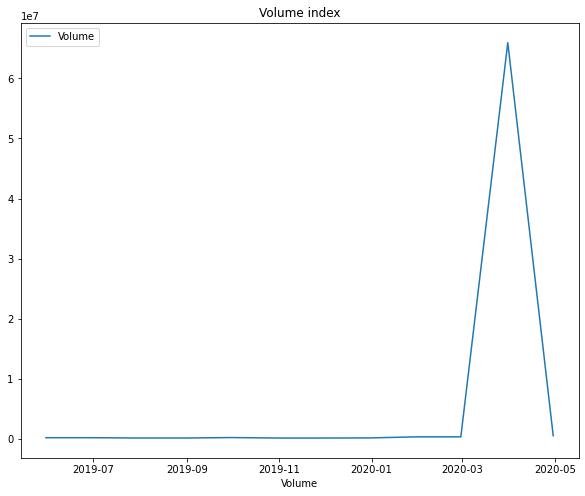

In [22]:
plt.figure(figsize=(10,8))
sns.lineplot(data=month_df)
plt.title('Volume index')
plt.xlabel('Volume')

<p>Plotting opening against closing price</p>

In [23]:
month_df=pd.DataFrame(data=dow_df,index=dow_df.index,columns=['Open','Close'])

In [24]:
month_df=month_df.asfreq('m')

In [25]:
month_df.isna().sum()

Open     4
Close    4
dtype: int64

In [26]:
month_df.fillna(method='bfill',inplace=True)

In [27]:
month_df.isna().sum()

Open     0
Close    0
dtype: int64

Text(0, 0.5, 'opening and closing price')

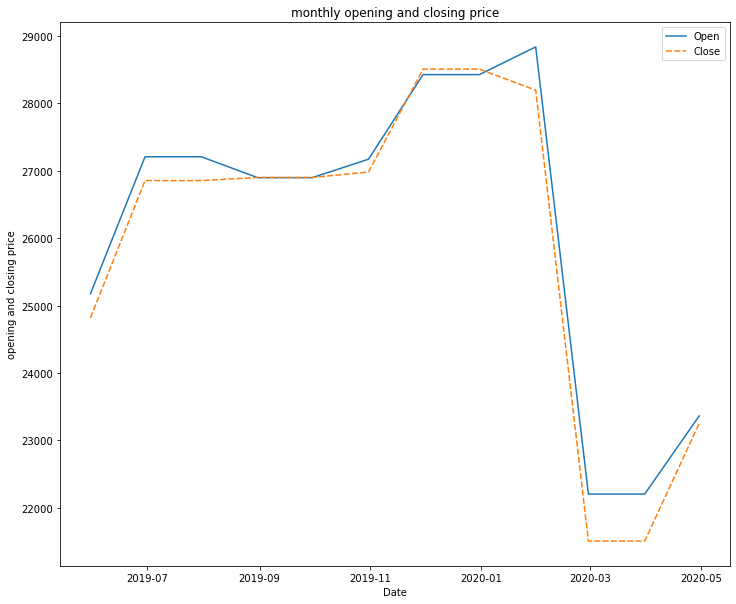

In [28]:
plt.figure(figsize=(12,10))
sns.lineplot(data=month_df)
plt.title('monthly opening and closing price')
plt.ylabel('opening and closing price')

In [29]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.991538,0.987793,0.991631,0.991631,-0.636380
High,0.991538,1.000000,0.984249,0.992402,0.992402,-0.618270
Low,0.987793,0.984249,1.000000,0.986508,0.986508,-0.608979
Close,0.991631,0.992402,0.986508,1.000000,1.000000,-0.620972
Adj Close,0.991631,0.992402,0.986508,1.000000,1.000000,-0.620972
Volume,-0.636380,-0.618270,-0.608979,-0.620972,-0.620972,1.000000


<b>Prediction</b>

<b> 1. Using Facebook Prophet</b>

<p>creating a dataframe with date and the target variable</p>

In [30]:
data_df=pd.DataFrame(data=df,index=df.index,columns=['Date','Close'])

In [31]:
data_df

,Date,Close
0,2019-05-20,25696.0
1,2019-05-21,25875.0
2,2019-05-22,25771.0
3,2019-05-23,25463.0
4,2019-05-24,25620.0
...,...,...
298,2020-05-12,23402.0
299,2020-05-13,23220.0
300,2020-05-14,23615.0
301,2020-05-15,23574.0


In [32]:
data_df.rename(columns={"Date":"ds","Close":"y"},inplace=True)

<p> we will not split the data into training and test sets but instead we will use all the data to fit the model and then ask the model to predict future values i.e. the stock price in 2021. This is because we want the model to forecast values on unseen data</p>

In [33]:
from fbprophet import Prophet

In [34]:
m=Prophet(daily_seasonality=True)
m.fit(data_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [35]:
future=m.make_future_dataframe(periods=365)
prediction=m.predict(future)

<Figure size 864x720 with 0 Axes>

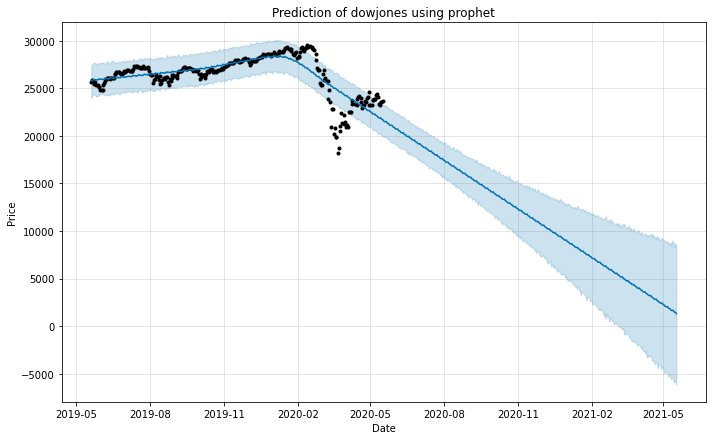

In [36]:
plt.figure(figsize=(12,10))
m.plot(prediction)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Prediction of dowjones using prophet')
plt.show()

huge drop starting from february due to covid-19

<p>The price will be around less that 5000 for the year 2021 </p>

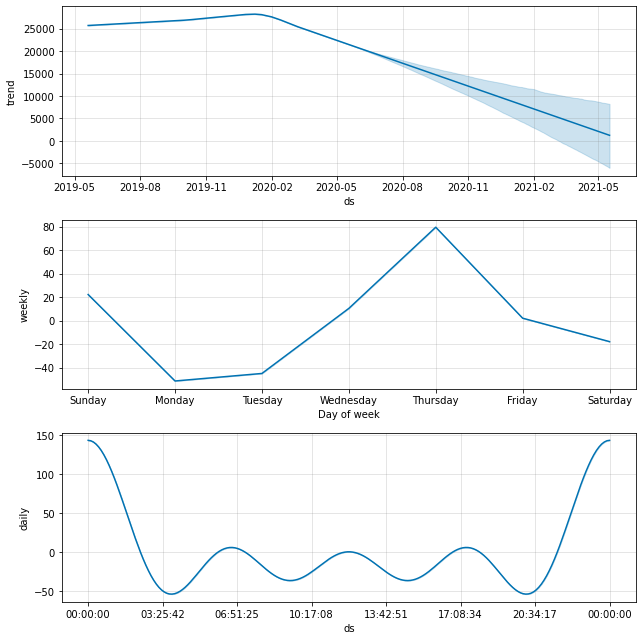

In [37]:
m.plot_components(prediction)
plt.show()

we can see the stock price is greatest mostly on Thursdays (2nd subplot) and the stock price will drop in 2021(1st subplot)

<b>2. Using ARIMA</b>

80:20 training test split

In [38]:
data_df=pd.DataFrame(data=df,index=df.index,columns=['Date','Close'])

In [39]:
data_df.set_index('Date',inplace=True)

In [ ]:
size=int(len(data_df)*0.8)
size

In [ ]:
x_train=data_df[:size]
x_test=data_df[size:]

plotting the distribution based on the training and testing datasets

<Figure size 864x720 with 0 Axes>

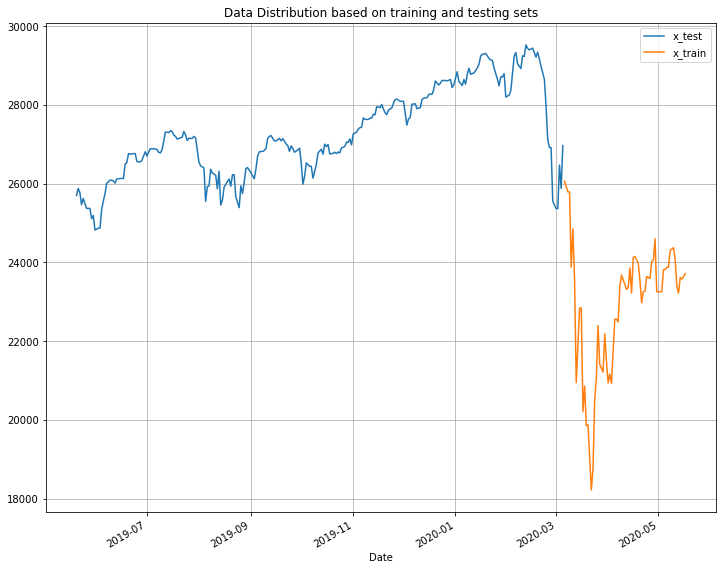

In [50]:
plt.figure(figsize=(12,10))
ax=x_train.plot(grid=True,figsize=(12,10))
x_test.plot(ax=ax,grid=True)
plt.legend(['x_test','x_train'])
plt.title('Data Distribution based on training and testing sets')
plt.show()

testing the timeseries for stationarity

In [47]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<b>Symmetric Mean Absolute Percentage Error (SMAPE)</b>

In [51]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +np.abs(y_true))))

In [58]:
train_ar = x_train['Close'].values
test_ar = x_test['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 891199.050
Symmetric mean absolute percentage error: 8.006


has a very high mse and thus might not be the best fit for the data</br>
smape on the other hand shows the model loss is not as high</br>
this discrepancy is present because SMAPE is commonly used loss a loss function for Time Series problems and can, therefore, provide a more reliable analysis</br>

plotting the training, actual and predicted prices

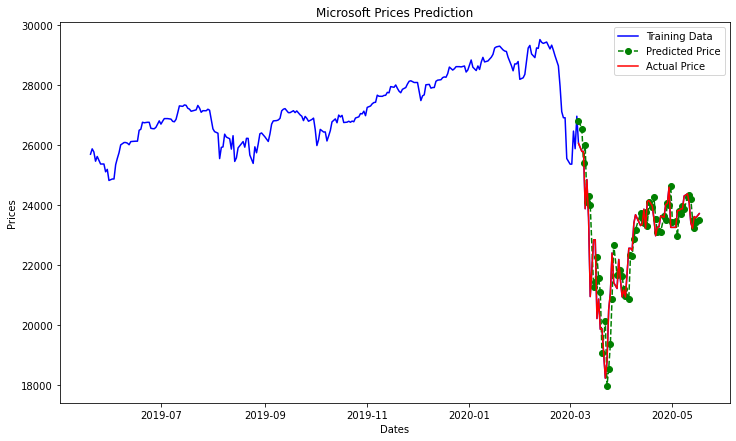

In [56]:
plt.figure(figsize=(12,7))
plt.plot(data_df['Close'], 'green', color='blue', label='Training Data')
plt.plot(x_test.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(x_test.index, x_test['Close'], color='red', label='Actual Price')
plt.title('Dowjones Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
#plt.xticks(np.arange(0,7982, 1300), data_df['Date'][0:7982:1300])
plt.legend()

<b>zooming in on the predicted and actual price</b>

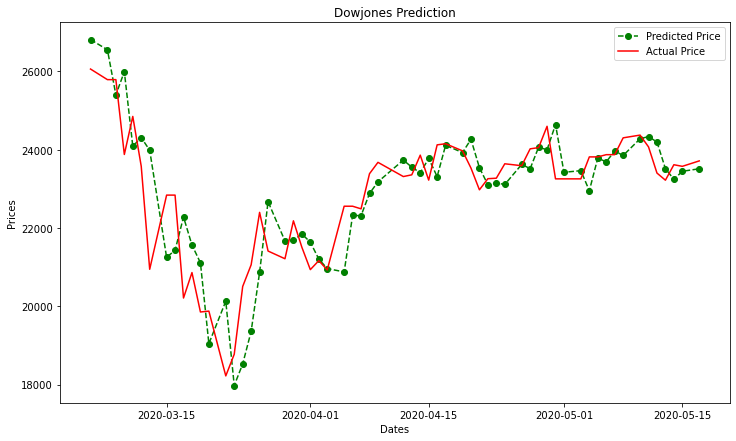

In [60]:
plt.figure(figsize=(12,7))
plt.plot(x_test.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(x_test.index, x_test['Close'], color='red', label='Actual Price')
plt.legend()
plt.title('Dowjones Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
#plt.xticks(np.arange(6386,7982, 300), df['Date'][6386:7982:300])
plt.legend()